In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [52]:
train_path = "./dogs-vs-cats/train/"
test_path = "./dogs-vs-cats/test/"

In [53]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [55]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
    MaxPooling2D(2, 2), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2), 
  
    Flatten(), 
    
    Dense(512, activation='relu'), 
    BatchNormalization(), 
    Dense(512, activation='relu'), 
    Dropout(0.1), 
    BatchNormalization(), 
    Dense(512, activation='relu'), 
    Dropout(0.2), 
    BatchNormalization(), 
    Dense(1, activation='sigmoid') 
])

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 23, 23, 64)       

In [57]:
model.compile( 
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
)

In [58]:
history = model.fit(training_set,
          epochs=25,
          validation_data=test_set)

Epoch 1/25
547/547 [==============================] - 678s 1s/step - loss: 0.7100 - accuracy: 0.5943 - val_loss: 1.9197 - val_accuracy: 0.5014
Epoch 2/25
547/547 [==============================] - 460s 841ms/step - loss: 0.5836 - accuracy: 0.6982 - val_loss: 0.5989 - val_accuracy: 0.6992
Epoch 3/25
547/547 [==============================] - 485s 886ms/step - loss: 0.4956 - accuracy: 0.7652 - val_loss: 0.4639 - val_accuracy: 0.7862
Epoch 4/25
547/547 [==============================] - 453s 828ms/step - loss: 0.4544 - accuracy: 0.7903 - val_loss: 0.5142 - val_accuracy: 0.7790
Epoch 5/25
547/547 [==============================] - 444s 812ms/step - loss: 0.4192 - accuracy: 0.8098 - val_loss: 0.3674 - val_accuracy: 0.8388
Epoch 6/25
547/547 [==============================] - 461s 843ms/step - loss: 0.3901 - accuracy: 0.8298 - val_loss: 0.3695 - val_accuracy: 0.8330
Epoch 7/25
547/547 [==============================] - 446s 815ms/step - loss: 0.3661 - accuracy: 0.8390 - val_loss: 0.6440 - va

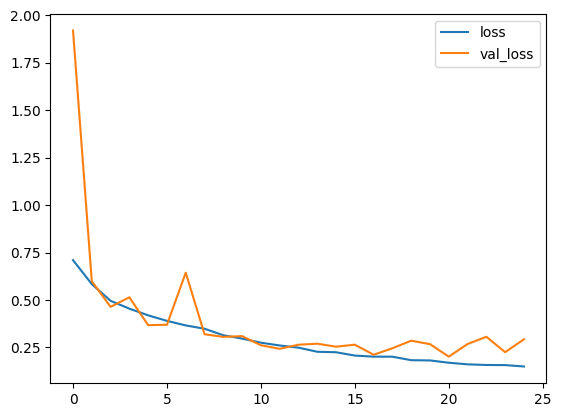

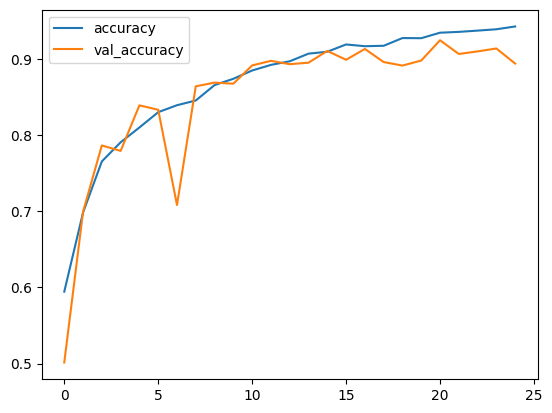

In [59]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show()

In [62]:
model.save("Cat_vs_dog.keras")

In [69]:
def predict_image(imagepath, classifier):
    predict = load_img(imagepath, target_size = (200, 200))   
    predict_modified = img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print("probability = " + str(probability*100))
        print("Prediction = " + prediction)
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print("probability = " + str(probability*100))
        print("Prediction = " + prediction)

In [70]:
img_path = "./dogs-vs-cats/test/cat/cat100.jpg"
predict_image(img_path, model)

1/1 [==============================] - 0s 27ms/step
probability = 99.84461123822257
Prediction = cat
